In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

In [18]:
train_click_log = pd.read_csv("../../tcdata/train_click_log.csv")
testA_click_log = pd.read_csv("../../tcdata/testA_click_log.csv")
sample_submit = pd.read_csv(".././../tcdata/sample_submit.csv")
articles = pd.read_csv("../../tcdata/articles.csv")
article_emb = pd.read_csv("../../tcdata/articles_emb.csv")

In [54]:
train_click_log.head()

,user_id,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,199999,160417,1507029570190,4,1,17,1,13,1
1,199999,5408,1507029571478,4,1,17,1,13,1
2,199999,50823,1507029601478,4,1,17,1,13,1
3,199998,157770,1507029532200,4,1,17,1,25,5
4,199998,96613,1507029671831,4,1,17,1,25,5


In [10]:
train_click_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112623 entries, 0 to 1112622
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   user_id              1112623 non-null  int64
 1   click_article_id     1112623 non-null  int64
 2   click_timestamp      1112623 non-null  int64
 3   click_environment    1112623 non-null  int64
 4   click_deviceGroup    1112623 non-null  int64
 5   click_os             1112623 non-null  int64
 6   click_country        1112623 non-null  int64
 7   click_region         1112623 non-null  int64
 8   click_referrer_type  1112623 non-null  int64
dtypes: int64(9)
memory usage: 76.4 MB


In [48]:
train_click_log['user_id'].describe()

count    1.112623e+06
mean     1.221198e+05
std      5.540349e+04
min      0.000000e+00
25%      7.934700e+04
50%      1.309670e+05
75%      1.704010e+05
max      1.999990e+05
Name: user_id, dtype: float64

In [49]:
articles['article_id'].describe()

count    364047.000000
mean     182023.000000
std      105091.461061
min           0.000000
25%       91011.500000
50%      182023.000000
75%      273034.500000
max      364046.000000
Name: article_id, dtype: float64

In [11]:
testA_click_log.head()

,user_id,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,249999,160974,1506959142820,4,1,17,1,13,2
1,249999,160417,1506959172820,4,1,17,1,13,2
2,249998,160974,1506959056066,4,1,12,1,13,2
3,249998,202557,1506959086066,4,1,12,1,13,2
4,249997,183665,1506959088613,4,1,17,1,15,5


In [13]:
testA_click_log.columns.tolist()

['user_id',
 'click_article_id',
 'click_timestamp',
 'click_environment',
 'click_deviceGroup',
 'click_os',
 'click_country',
 'click_region',
 'click_referrer_type']

In [12]:
testA_click_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518010 entries, 0 to 518009
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   user_id              518010 non-null  int64
 1   click_article_id     518010 non-null  int64
 2   click_timestamp      518010 non-null  int64
 3   click_environment    518010 non-null  int64
 4   click_deviceGroup    518010 non-null  int64
 5   click_os             518010 non-null  int64
 6   click_country        518010 non-null  int64
 7   click_region         518010 non-null  int64
 8   click_referrer_type  518010 non-null  int64
dtypes: int64(9)
memory usage: 35.6 MB


In [14]:
articles.head()

,article_id,category_id,created_at_ts,words_count
0,0,0,1513144419000,168
1,1,1,1405341936000,189
2,2,1,1408667706000,250
3,3,1,1408468313000,230
4,4,1,1407071171000,162


In [15]:
articles.columns.tolist()

['article_id', 'category_id', 'created_at_ts', 'words_count']

In [19]:
article_emb.head()

,article_id,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_240,emb_241,emb_242,emb_243,emb_244,emb_245,emb_246,emb_247,emb_248,emb_249
0,0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,...,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,...,-0.487843,0.823124,0.412688,-0.338654,0.320786,0.588643,-0.594137,0.182828,0.397090,-0.834364
2,2,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,-0.754899,...,0.454756,0.473184,0.377866,-0.863887,-0.383365,0.137721,-0.810877,-0.447580,0.805932,-0.285284
3,3,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,-0.040099,...,0.271535,0.036040,0.480029,-0.763173,0.022627,0.565165,-0.910286,-0.537838,0.243541,-0.885329
4,4,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,-0.600554,...,0.238286,0.809268,0.427521,-0.615932,-0.503697,0.614450,-0.917760,-0.424061,0.185484,-0.580292


In [20]:
article_emb.columns.tolist()

['article_id',
 'emb_0',
 'emb_1',
 'emb_2',
 'emb_3',
 'emb_4',
 'emb_5',
 'emb_6',
 'emb_7',
 'emb_8',
 'emb_9',
 'emb_10',
 'emb_11',
 'emb_12',
 'emb_13',
 'emb_14',
 'emb_15',
 'emb_16',
 'emb_17',
 'emb_18',
 'emb_19',
 'emb_20',
 'emb_21',
 'emb_22',
 'emb_23',
 'emb_24',
 'emb_25',
 'emb_26',
 'emb_27',
 'emb_28',
 'emb_29',
 'emb_30',
 'emb_31',
 'emb_32',
 'emb_33',
 'emb_34',
 'emb_35',
 'emb_36',
 'emb_37',
 'emb_38',
 'emb_39',
 'emb_40',
 'emb_41',
 'emb_42',
 'emb_43',
 'emb_44',
 'emb_45',
 'emb_46',
 'emb_47',
 'emb_48',
 'emb_49',
 'emb_50',
 'emb_51',
 'emb_52',
 'emb_53',
 'emb_54',
 'emb_55',
 'emb_56',
 'emb_57',
 'emb_58',
 'emb_59',
 'emb_60',
 'emb_61',
 'emb_62',
 'emb_63',
 'emb_64',
 'emb_65',
 'emb_66',
 'emb_67',
 'emb_68',
 'emb_69',
 'emb_70',
 'emb_71',
 'emb_72',
 'emb_73',
 'emb_74',
 'emb_75',
 'emb_76',
 'emb_77',
 'emb_78',
 'emb_79',
 'emb_80',
 'emb_81',
 'emb_82',
 'emb_83',
 'emb_84',
 'emb_85',
 'emb_86',
 'emb_87',
 'emb_88',
 'emb_89',
 'emb

In [21]:
sample_submit.head()

,user_id,article_1,article_2,article_3,article_4,article_5
0,200000,1,2,3,4,5
1,200001,1,2,3,4,5
2,200002,1,2,3,4,5
3,200003,1,2,3,4,5
4,200004,1,2,3,4,5


In [22]:
sample_submit.columns.tolist()

['user_id', 'article_1', 'article_2', 'article_3', 'article_4', 'article_5']

# user split

In [24]:
print(train_click_log['user_id'].nunique())
print(train_click_log['click_article_id'].nunique())

200000
31116


In [27]:
print(articles['article_id'].nunique())

364047


In [29]:
set(articles['article_id']) == set(article_emb['article_id'])

True

In [31]:
set(testA_click_log['user_id']) & set(train_click_log['user_id'])

set()

In [34]:
print(testA_click_log['user_id'].nunique())
print(testA_click_log['click_article_id'].nunique())

50000
16330


In [41]:
(set(testA_click_log['click_article_id']) < set(articles['article_id']))

True

# sequence

In [42]:
# 根据 train log 构造 user_id 的历史点击文章序列
user_hist_click_dict = dict()
for row in train_click_log.itertuples():
    user_id = row.user_id
    article_id = row.click_article_id
    if user_id not in user_hist_click_dict:
        user_hist_click_dict[user_id] = []
    user_hist_click_dict[user_id].append(article_id)

In [50]:
user_len_dict = {}
for user_id, hist in user_hist_click_dict.items():
    user_len_dict[user_id] = len(hist)

In [53]:
mean_len = np.mean(list(user_len_dict.values()))
max_len = np.max(list(user_len_dict.values()))
min_len = np.min(list(user_len_dict.values()))
medium_len = np.median(list(user_len_dict.values()))
print(f"mean history click len: {mean_len}")
print(f"max history click len: {max_len}")
print(f"min history click len: {min_len}")
print(f"medium history click len: {medium_len}")

mean history click len: 5.563115
max history click len: 241
min history click len: 2
medium history click len: 3.0


In [58]:
user_len_dict.values()

dict_values([11, 40, 2, 13, 7, 22, 14, 36, 9, 5, 48, 2, 12, 14, 15, 9, 2, 23, 95, 15, 22, 6, 9, 14, 19, 34, 3, 5, 2, 11, 6, 2, 4, 9, 15, 21, 5, 2, 24, 22, 2, 16, 4, 3, 15, 5, 4, 3, 11, 6, 4, 7, 19, 3, 12, 24, 19, 38, 5, 16, 19, 26, 9, 4, 2, 2, 50, 8, 11, 35, 75, 2, 10, 14, 55, 3, 5, 24, 4, 2, 10, 23, 3, 2, 2, 15, 4, 2, 15, 4, 22, 7, 2, 2, 4, 2, 12, 11, 6, 15, 23, 2, 2, 11, 2, 11, 17, 12, 10, 4, 15, 6, 6, 4, 13, 14, 2, 2, 8, 14, 5, 3, 21, 2, 5, 2, 26, 36, 6, 2, 14, 3, 2, 21, 2, 3, 43, 19, 8, 2, 21, 10, 22, 9, 12, 2, 15, 4, 8, 7, 2, 8, 6, 4, 4, 6, 2, 12, 9, 2, 4, 5, 10, 19, 45, 5, 17, 25, 3, 2, 9, 32, 2, 10, 42, 14, 5, 10, 14, 14, 2, 5, 16, 14, 3, 8, 6, 14, 16, 10, 17, 4, 24, 9, 24, 13, 8, 2, 19, 24, 25, 21, 2, 43, 22, 5, 14, 22, 11, 11, 25, 21, 20, 18, 4, 10, 13, 2, 2, 2, 2, 5, 7, 18, 13, 7, 9, 11, 2, 2, 3, 8, 2, 2, 9, 4, 26, 6, 7, 52, 4, 2, 2, 5, 60, 10, 15, 13, 11, 3, 12, 58, 32, 17, 2, 5, 11, 4, 24, 2, 4, 4, 13, 5, 4, 13, 12, 11, 4, 42, 4, 3, 36, 5, 9, 39, 13, 11, 2, 2, 6, 9, 2, 42, 

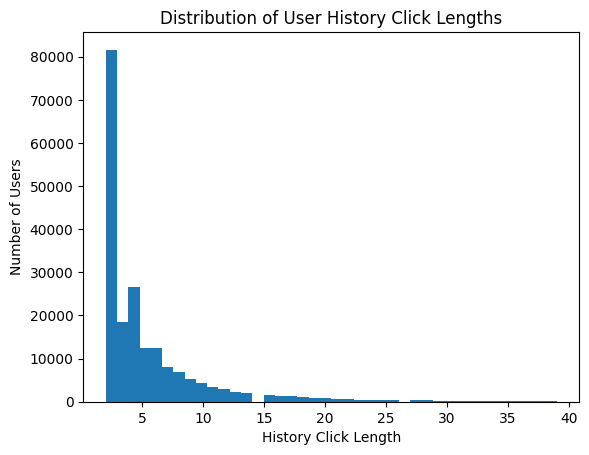

In [59]:
# 绘制len 的直方图
import matplotlib.pyplot as plt
plt.hist([v for v in user_len_dict.values() if v < 40], bins=40)
plt.xlabel('History Click Length')
plt.ylabel('Number of Users')
plt.title('Distribution of User History Click Lengths')
plt.show()

# processed

In [60]:
train_data = pd.read_csv("../../user_data/processed/sasrec_format_by_user_train.csv")
test_data = pd.read_csv("../../user_data/processed/sasrec_format_by_user_test.csv")

In [61]:
train_data.head()

,index,user_id_mapped,sequence_item_ids,sequence_timestamps,sequence_category_ids,sequence_created_at_ts,sequence_words_count,environment,deviceGroup,os,country,region,referrer_type
0,0,1,"30761,157508","100,100","27,282","71,71","28,100",3,1,6,1,25,2
1,1,2,"289198,63747","100,100","419,134","71,71","41,28",3,1,6,1,25,6
2,2,3,"36163,168402","100,100","44,298","71,70","66,73",3,3,8,1,25,2
3,3,4,"50645,36163","100,100","100,44","71,71","52,66",3,3,1,1,25,2
4,4,5,"42568,39895","100,100","68,67","71,71","93,40",3,1,4,1,16,1


In [68]:
import torch
with open("../../user_data/processed/article_embedding.pt", "rb") as f:
    article_embedding = torch.load(f, weights_only=False)

In [71]:
len(article_embedding)

364047